## Laboratorio 3

### Parte 1

#### ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [3]:
import numpy as np 
m = np.random.choice(a=[False, True], size=1000)

In [5]:
m.size

1000

#### Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [16]:
arreglo = np.arange(2,101,2)
arreglo1= -np.sort(-arreglo).reshape(5,10)
arreglo1[4,:]

array([20, 18, 16, 14, 12, 10,  8,  6,  4,  2])

### Dado el array. 

In [33]:
array = np.array([[ 2,4,5,6],[0,3,7,4],[8,8,5,2],[1,5,6,1]])
array

array([[2, 4, 5, 6],
       [0, 3, 7, 4],
       [8, 8, 5, 2],
       [1, 5, 6, 1]])

#### Seleccione con una instrucción el subarray de elementos

In [19]:
array[1,:]

array([0, 3, 7, 4])

#### Después, seleccione el subarray de elementos

In [32]:
array[[0,0] ,[0,2]]
array[[2,0],[2,2]]

array([5, 5])

#### obtenga la media aritmética de la diferencia (a-b).

In [34]:
a = np.array([1, 4, 2, 7]) 
b = np.array([1, 3, 2, 9])

In [36]:
c = a - b
print (c)

[ 0  1  0 -2]


In [37]:
media= c.mean()
print (media)

-0.25


#### Agregue a este array las coordenadas (37.1, -3.6). Muestre en pantalla las dimensiones del nuevo array.

In [38]:
xy = np.array([[1.33, 4.5],
                        [30.0, 10.7],
                        [70.2, 0.5]])

xy2 = np.array([[37.1, -3.6]])

nuevoxy = np.concatenate((xy, xy2), axis=0)

print("Nuevo array:", nuevoxy)
print("Dimensiones:", nuevoxy.shape)

Nuevo array: [[ 1.33  4.5 ]
 [30.   10.7 ]
 [70.2   0.5 ]
 [37.1  -3.6 ]]
Dimensiones: (4, 2)


#### Copie el array del ejercicio anterior. Traspóngalo (.Agregue ahora dos nuevos pares de coordenadas: (10.8,3.0) y (35.8, 12.0).

In [42]:
xy = np.array([[1.33, 4.5],
                        [30.0, 10.7],
                        [70.2, 0.5]])

transponer = xy.T.copy()
xynuevas = np.array([[10.8, 3.0], 
                     [35.8, 12.0]])
transponerxynuevas = xynuevas.T.copy()

xytranspuestas = np.concatenate((transponer, transponerxynuevas), axis=1)

print("Nuevo array:", xytranspuestas)
print("Dimensiones ", xytranspuestas.shape)

Nuevo array: [[ 1.33 30.   70.2  10.8  35.8 ]
 [ 4.5  10.7   0.5   3.   12.  ]]
Dimensiones  (2, 5)


### Parte 2

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
dataset = pd.read_csv("NucleosPoblacion.csv")
dataset.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


#### ¿Cuántos Municipios tienen más de 100000 habitantes?.

In [46]:
municipios = dataset[dataset['Poblacion'] > 100000]
nummunicipios = len(municipios)
print("Municipios con mas de 100k habitantes", nummunicipios)

Municipios con mas de 100k habitantes 62


#### Realice una gráfica de barras sobre la polbación de cada ciudad, ordenela de menor a mayo y responda:

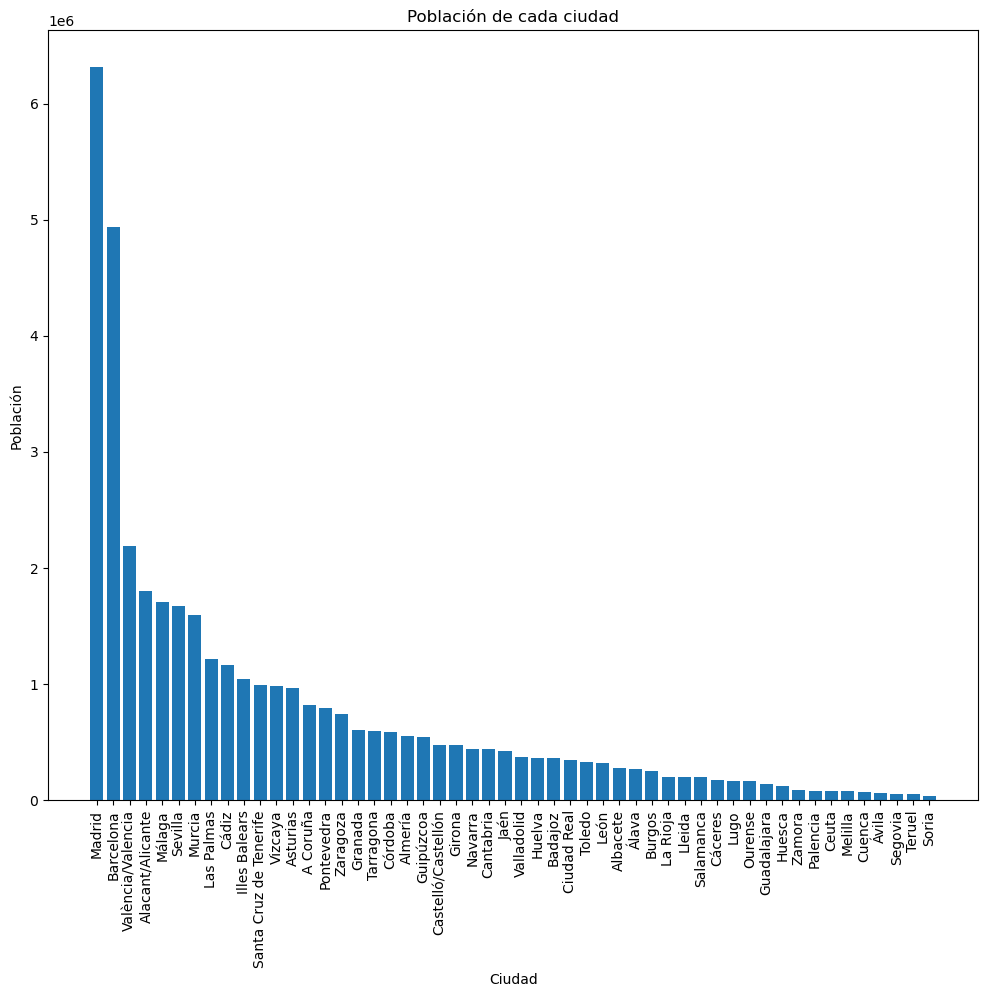

In [48]:
poblacion = dataset.groupby('Provincia')['Poblacion'].sum().reset_index()

pxprovincia = poblacion.sort_values('Poblacion', ascending=False)

plt.figure(figsize=(12, 10))
plt.bar(pxprovincia['Provincia'], pxprovincia['Poblacion'])
plt.xlabel('Ciudad')
plt.ylabel('Población')
plt.title('Población de cada ciudad')
plt.xticks(rotation=90)
plt.show()

#### ¿Cuál es la segunda ciudad más poblada?

In [49]:
preguntaa = dataset.groupby('Municipio')['Poblacion'].sum().nlargest(2).index[1]
print("La segunda ciudad más poblada es:", preguntaa)

La segunda ciudad más poblada es: Barcelona


#### ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

In [51]:
granada = pxprovincia[pxprovincia['Provincia'] == 'Granada'].index[0] + 0
print("Granada ocupa la posición número:", granada)

Granada ocupa la posición número: 17


#### ¿Cuántos municipios de Navarra tienen más de 5000 habitantes?.

In [52]:
navarra = dataset[dataset['Provincia'] == 'Navarra']

nmas = navarra[navarra['Poblacion'] > 5000]
cantmun = len(nmas)

print("Cantidad de municipios de Navarra con población mayor a 5k habitantes es:", cantmun)

Cantidad de municipios de Navarra con población mayor a 5k habitantes es: 11


#### ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [53]:
municipionorte = dataset.loc[dataset['Y'].idxmax()]

print("Municipio más al norte:")
print("Municipio:", municipionorte['Municipio'])
print("Provincia:", municipionorte['Provincia'])
print("Población:", municipionorte['Poblacion'])
print("Coordenada Y (latitud):", municipionorte['Y'])

Municipio más al norte:
Municipio: Viveiro
Provincia: Lugo
Población: 16211.0
Coordenada Y (latitud): 43.6255783851


#### Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [54]:
municipiosG = dataset[dataset['Provincia'] == 'Granada']

media = municipiosG['Poblacion'].mean()
mediana = municipiosG['Poblacion'].median()
desviacion = municipiosG['Poblacion'].std()
valor_maximo = municipiosG['Poblacion'].max()
valor_minimo = municipiosG['Poblacion'].min()

print("Media de la población:", media)
print("Mediana de la población:", mediana)
print("Desviación estándar:", desviacion)
print("Valor máximo de la población:", valor_maximo)
print("Valor mínimo de la población:", valor_minimo)

Media de la población: 30217.85
Mediana de la población: 17526.0
Desviación estándar: 50355.49171459277
Valor máximo de la población: 239154.0
Valor mínimo de la población: 10386.0


#### Realice un histograma con la población de los Municipios para cada una de las provincias.

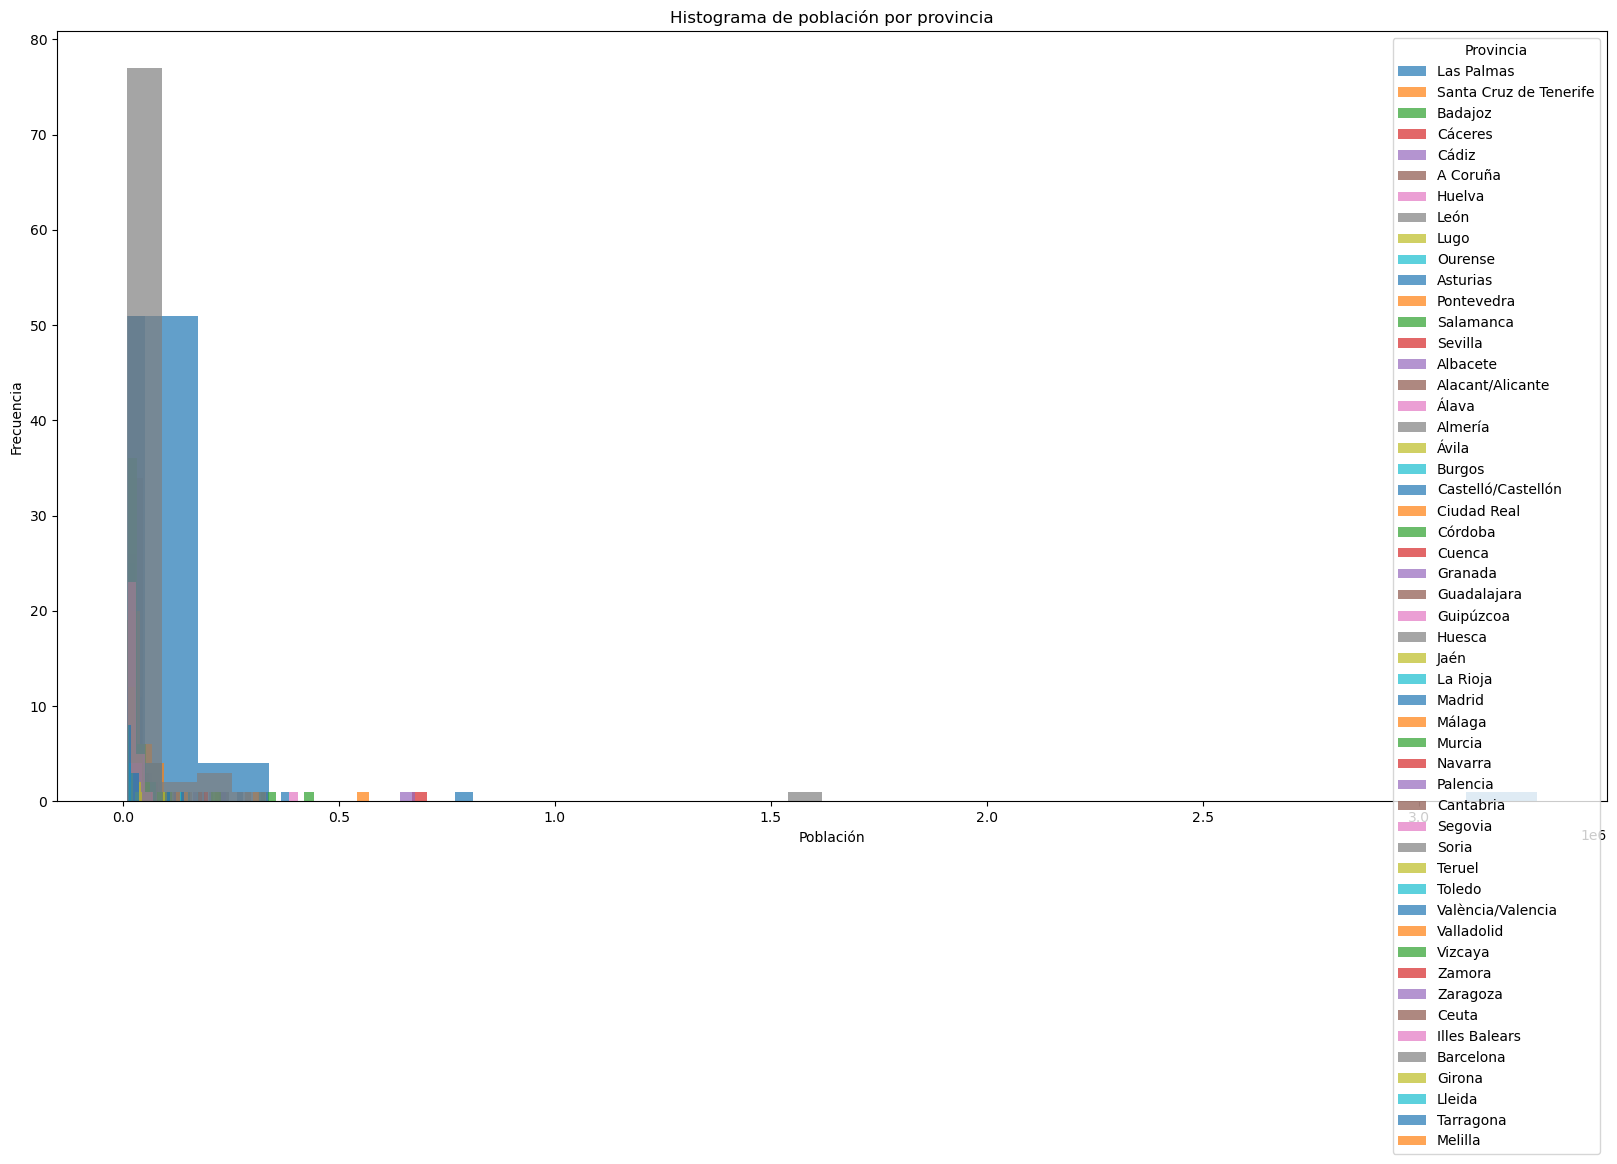

In [75]:
provincias = dataset['Provincia'].unique()
cantprov = len(provincias)
cantprov
municipio = dataset['Municipio'].unique()
plt.figure(figsize=(20, 10))
for provincia in provincias:
    poblacion_provincia = dataset[dataset['Provincia'] == provincia]['Poblacion']
    plt.hist(poblacion_provincia, bins=20, alpha=0.7, label=provincia)

plt.xlabel('Población')
plt.ylabel('Frecuencia')
plt.title('Histograma de población por provincia')
plt.legend(title='Provincia', loc='upper right')
plt.show()


#### Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?.

In [76]:
muni = dataset.sample(n=50, replace=False)

promedio = muni['Poblacion'].mean()
desviacion = muni['Poblacion'].std()

print("Promedio de la población :", promedio)
print("Desviación estándar de la población :", desviacion)

Promedio de la población : 43545.32
Desviación estándar de la población : 59172.406442371626


#### Determine los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero.

In [82]:
!pip install pygeodesic

  Obtaining dependency information for pygeodesic from https://files.pythonhosted.org/packages/f0/9b/8e10a97a88a5a862687a8c3a25ab1c363690c639afa69c9290c052a0015e/pygeodesic-0.1.9-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB 435.7 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.3 MB 751.6 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.3 MB 919.0 kB/s eta 0:00:02
   ------- -------------------------------- 0.2/1.3 MB 1.1 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.3 MB 1.5 MB/s eta 0:00:01
   ----------------- ---------------------- 0.6/1.3 MB 2.0 MB/s eta 0:00:01
   ------------------- -------------------- 0.6/1.3 MB 1.9 MB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.3 MB 2.2 MB/s eta 0:00:01
   ------------------------- -----

In [83]:
import pygeodesic.geodesic as geodesic

In [88]:
points = 40.4168
faces = -3.7038
geoalg = geodesic.PyGeodesicAlgorithmExact(points, faces)


Error in PyGeodesicAlgorithmExact.__cinit__: 'points' array has incorrect shape


Error in PyGeodesicAlgorithmExact.geodesicDistance: PyGeodesicAlgorithmExact class was not initialized correctly


In [90]:
filename = pd.read_csv("NucleosPoblacion.csv")
result = geodesic.read_mesh_from_file(filename)
if result:
    points, faces = result

TypeError: expected str, bytes or os.PathLike object, not DataFrame

In [94]:
source_indices = np.array([dataset['X'], dataset['Y']])
#print(source_indices)
target_indices = np.array([40.4168,-3.7038])
distances, best_source = geoalg.geodesicDistances(source_indices, target_indices)

[[-1.54460123e+01 -1.40133008e+01 -1.35514512e+01 ... -1.13056385e+00
  -3.94836366e+00  1.29113540e-02]
 [ 2.79005419e+01  2.84189662e+01  2.89606494e+01 ...  3.79957146e+01
   3.98666990e+01  3.99735678e+01]]
Error in PyGeodesicAlgorithmExact.geodesicDistances: PyGeodesicAlgorithmExact class was not initialized correctly
